<a href="https://colab.research.google.com/github/canon14/Projects-Compilation/blob/master/Life_Expectancy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://content.fortune.com/wp-content/uploads/2018/02/life-expectancy-decline.jpg?resize=1200,600", width=1000, height=250)

This dataset was created to answer the following questions:
1. Do various predicting factors that has been chosen initially really affect Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value increase its healthcare expenditure in order to improve its average lifespan?
3. How do Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy have a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol, etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have a positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have a lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?

In [ ]:
pip install chart-studio

In [ ]:
import time
import requests

#Visualizations
import numpy as np
import pandas as pd
import missingno 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline
sns.set_style('whitegrid')

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Life Expectancy Data.csv')

# **Data Description:**

**Country** -> country

**Year** -> Year

**Status** -> Developed or Developing status

**Life Expectancy** -> Life Expectancy in age

**Adult Mortality** -> Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**Infant Deaths** -> Number of Infant Deaths per 1000 population

**Alcohol** -> Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Percentage Expenditure** -> Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B** -> Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles** -> Measles - number of reported cases per 1000 population

**BMI** -> Average Body Mass Index of entire population

**Under-five deaths** -> Number of under-five deaths per 1000 population

**Polio** -> Polio (Pol3) immunization coverage among 1-year-olds (%)

**Total expenditure** -> General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria** -> Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS** -> Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP** -> Gross Domestic Product per capita (in USD)

**Population** -> Population of the country

**thinness 1-19 years** -> Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

**thinness 5-9 years** -> Prevalence of thinness among children for Age 5 to 9(%)

**Income composition of resources** -> Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling** -> Number of years of Schooling(years)

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.shape

(2938, 22)

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Check for missing values**

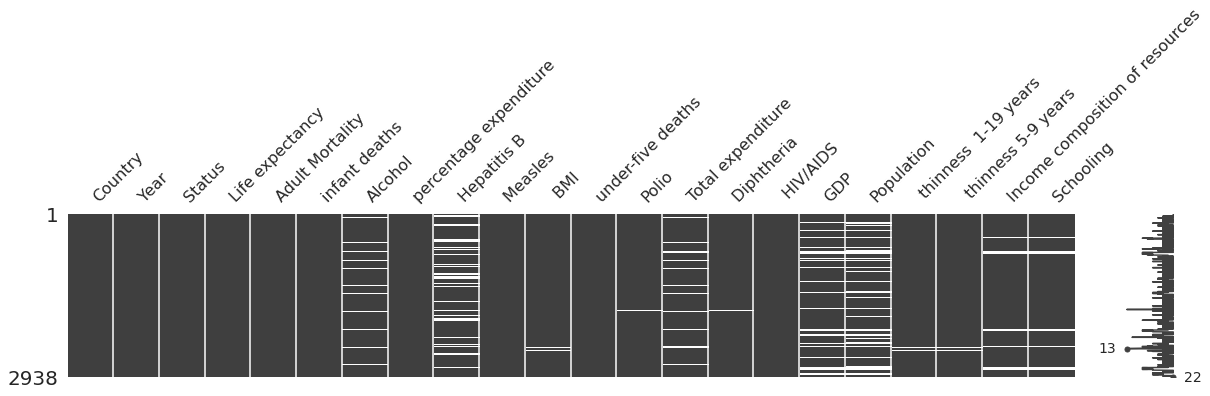

In [ ]:
missingno.matrix(data, figsize=(20,3))

In [ ]:
index = data.isnull().sum().index
missing_values = list(data.isnull().sum())
missing_dict = dict(zip(index, missing_values))

for k,v in missing_dict.items():
  result = round((v/len(data)) * 100, 2)
  print(f' {k}: {v} missing values or {result}%')

 Country: 0 missing values or 0.0%
 Year: 0 missing values or 0.0%
 Status: 0 missing values or 0.0%
 Life expectancy : 10 missing values or 0.34%
 Adult Mortality: 10 missing values or 0.34%
 infant deaths: 0 missing values or 0.0%
 Alcohol: 194 missing values or 6.6%
 percentage expenditure: 0 missing values or 0.0%
 Hepatitis B: 553 missing values or 18.82%
 Measles : 0 missing values or 0.0%
  BMI : 34 missing values or 1.16%
 under-five deaths : 0 missing values or 0.0%
 Polio: 19 missing values or 0.65%
 Total expenditure: 226 missing values or 7.69%
 Diphtheria : 19 missing values or 0.65%
  HIV/AIDS: 0 missing values or 0.0%
 GDP: 448 missing values or 15.25%
 Population: 652 missing values or 22.19%
  thinness  1-19 years: 34 missing values or 1.16%
  thinness 5-9 years: 34 missing values or 1.16%
 Income composition of resources: 167 missing values or 5.68%
 Schooling: 163 missing values or 5.55%


Hepatitis B and GDP have the most missing values, we will probably do some feature engineering to fix these two.

In [ ]:
# We do not want to have any null values on our dependent variables which is the Life Expectancy 
# Since we only have 10 null values, we will fill them with the mean 
data['Life expectancy '].fillna(data['Life expectancy '].mean(), inplace=True)

In [ ]:
#To perform the analysis, let's create a new dataframe so that still keep the default dataframe 
df = pd.DataFrame() 

## **Let's explore each of these features individually**

We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#Create function to calculate null values

def nullcount(col):
  return data[col].isnull().sum()

**Feature 1: Country**

In [ ]:
data['Country'].nunique()

193

In [ ]:
code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
code.drop('GDP (BILLIONS)', axis=1, inplace=True)

In [ ]:
country_group = data.groupby('Country').mean()['Life expectancy '].sort_values(ascending=False).dropna()

In [ ]:
countries_df = pd.DataFrame()
countries_df['Country'] = country_group.index
countries_df['Avg.Life Expectancy'] = list(country_group)
countries = pd.merge(left=countries_df, right=code, how='left', left_on='Country', right_on='COUNTRY')
countries.drop(['COUNTRY'], axis=1, inplace=True)

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = countries['CODE'],
    z = countries['Avg.Life Expectancy'],
    text = countries['Country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Average Life Expectancy',
))

fig.update_layout(
    title_text='2000-2015 Avg. Life Expectancy Around the World',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show(renderer="colab")

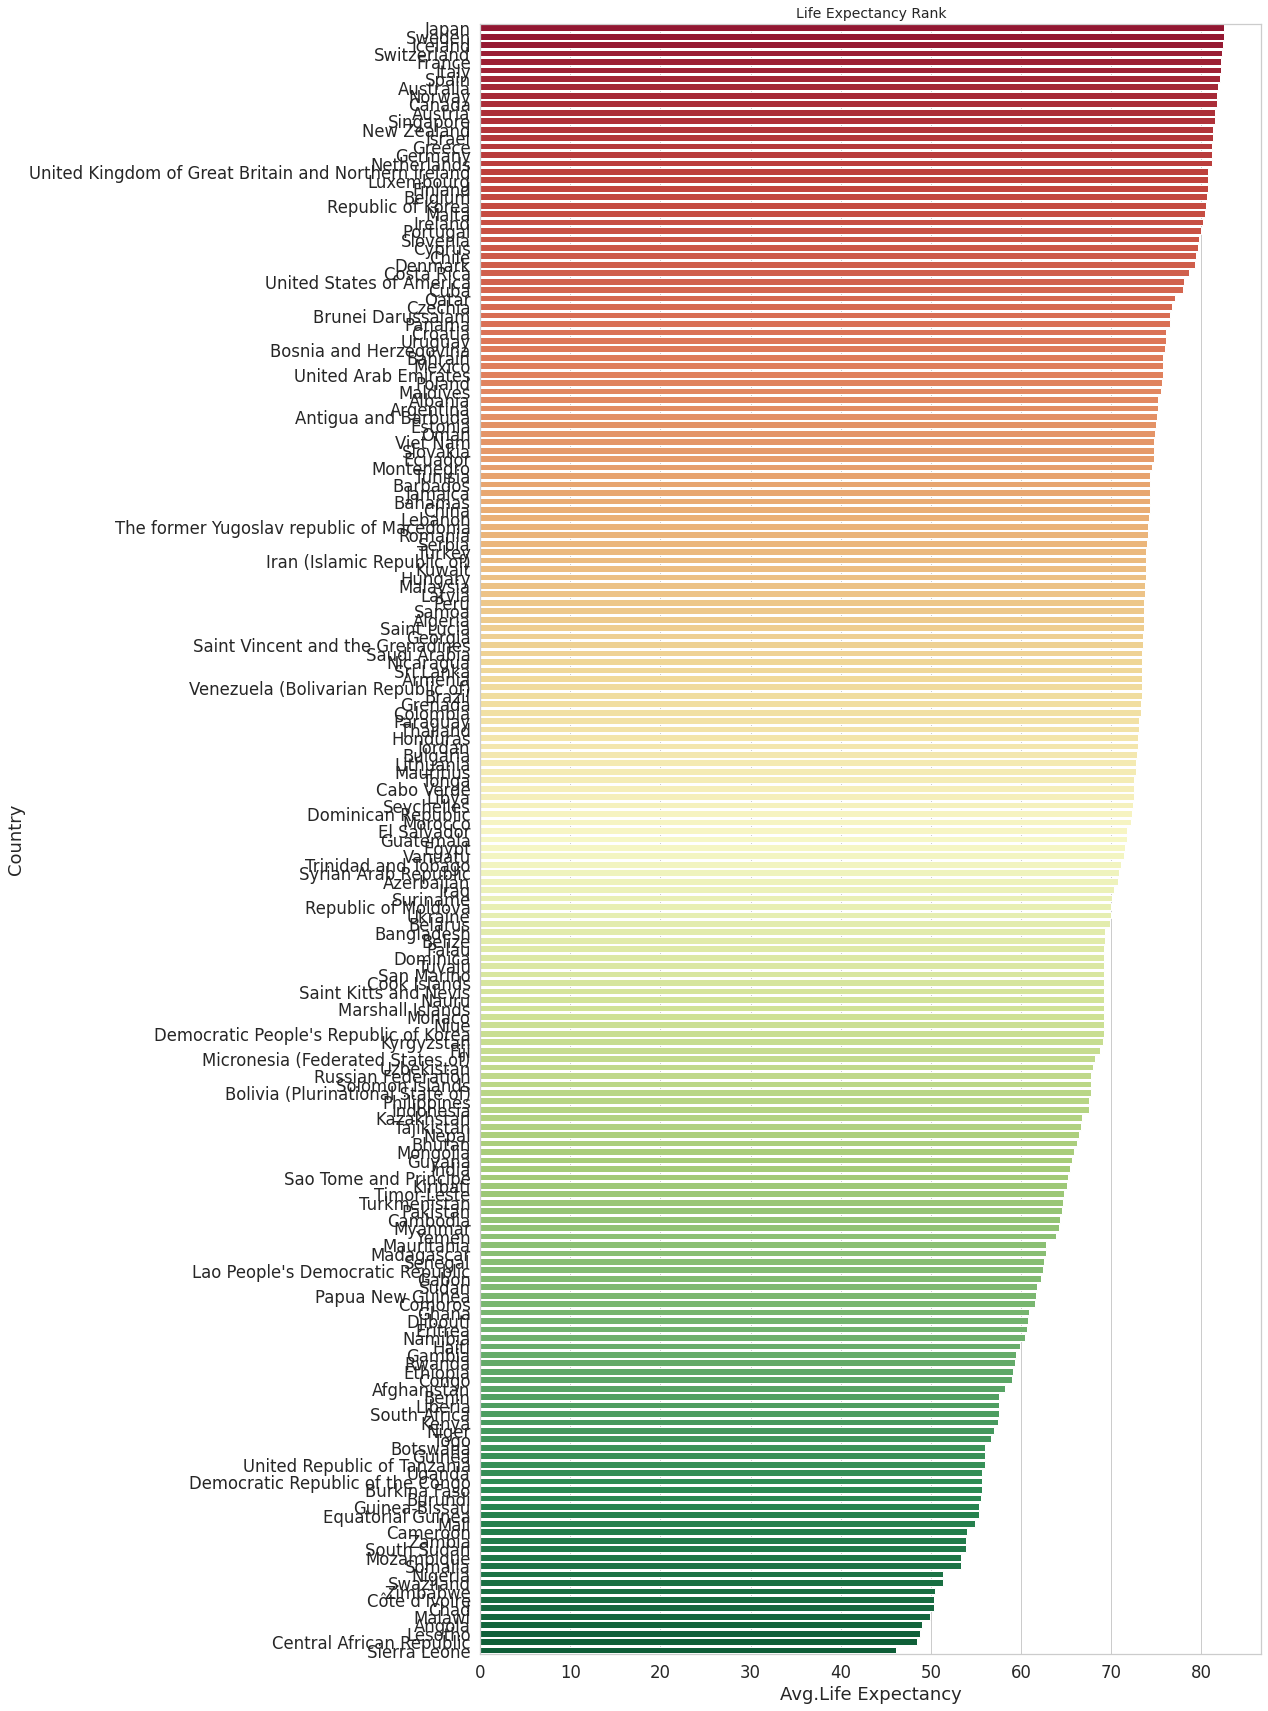

In [ ]:
#Life Expectancy Rank
plt.figure(figsize=(14,30))
sns.barplot(y='Country', x='Avg.Life Expectancy', data=countries_df,palette='RdYlGn')
plt.title('Life Expectancy Rank', fontsize=14)
plt.show()

In [ ]:
#Categorize countries based on the avg.life expectancy and add to the df_bin for our future machine learning model 

# Country_Category description:
# 5 -> very high life expectancy
# 4 -> high life expectancy
# 3 -> average life expectancy
# 2 -> low life expectancy
# 1 -> very low life expectancy

cut_labels_5 = ['1', '2', '3', '4', '5']
cut_bins = [30, 42, 54, 66, 78, 90]
df['Country_Category'] = pd.cut(data['Life expectancy '], bins=cut_bins, labels=cut_labels_5)

In [ ]:
df['Life_Expectancy'] = data['Life expectancy ']

**Feature 2 & 3: Year, Status**

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
fig = px.pie(data, values='Life expectancy ', names='Status', color_discrete_sequence=px.colors.sequential.RdBu, )
fig.show(renderer="colab")

4 out of 5 countries in this world are still developing. 

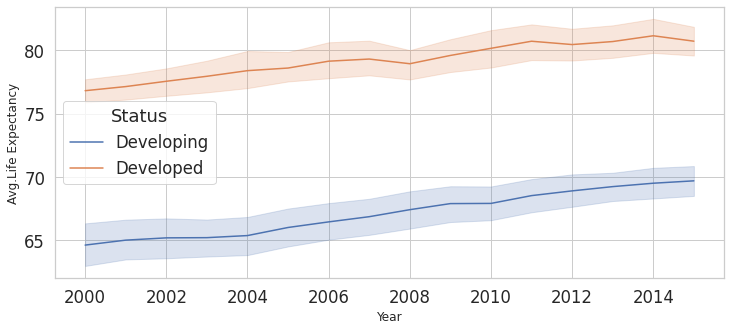

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Year', y='Life expectancy ', data=data, hue='Status')
plt.ylabel('Avg.Life Expectancy', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

Both developing and developed countries have shown similar pattern in an increase in their average life expectancy yoy.

In [ ]:
df['Status'] = np.where(data['Status'] == 'Developed', 1, 0) # change status to 0 for developing and 1 for developed

**Feature 4: Adult Mortality**

Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

In [ ]:
nullcount('Adult Mortality')

10

In [ ]:
data['Adult Mortality'].fillna(data['Adult Mortality'].mean(), inplace=True)

In [ ]:
data['Adult Mortality']

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
        ...  
2933    723.0
2934    715.0
2935     73.0
2936    686.0
2937    665.0
Name: Adult Mortality, Length: 2938, dtype: float64

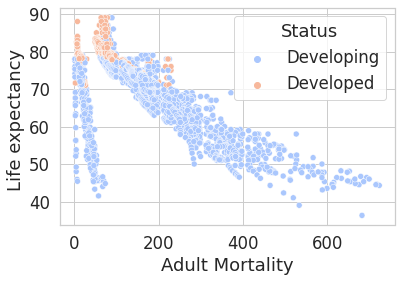

In [ ]:
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=data, hue='Status', palette='coolwarm')

The Mortality Rate and Life expectancy showing a negative correlation, this make sense because the older a person become, the higher chance for him/her to die. But most people from Developed countries have much less mortality rate and higher chance to live until over 70 years old.

In [ ]:
df['Adult_Mortality'] = data['Adult Mortality']

**Feature 5: Infants Death** 

Number of Infant Deaths per 1000 population

In [ ]:
nullcount('infant deaths')

0

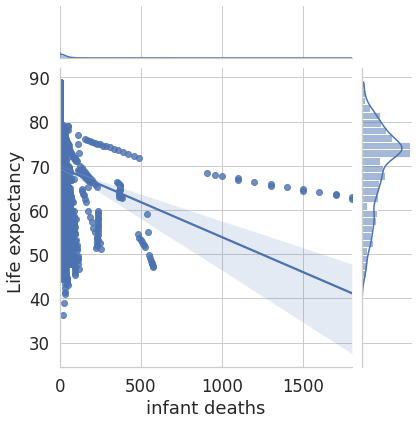

In [ ]:
sns.jointplot(x='infant deaths', y='Life expectancy ', data=data, kind='reg')

Countries with life expectancies below 70 years old have a much higher infants death rate. 

In [ ]:
df['Infant_Deaths'] = data['infant deaths']

**Feature 6: Alcohol** 

Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

In [ ]:
nullcount('Alcohol')

194

In [ ]:
data['Alcohol'].fillna(data['Alcohol'].mean(), inplace=True)

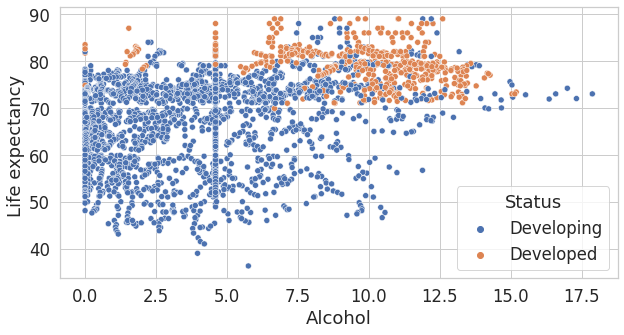

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Alcohol', y='Life expectancy ', data=data, hue='Status')

People from the Developed Countries consume alcohol more than people from the developing countries, yet their life expectancy are much higher. 

We see there are some countries with alcohol consumption more than 15 litres per capita and still have life expectancy above average, what are these countries? 

In [ ]:
data[data['Alcohol'] > 15][['Country', 'Year', 'Alcohol']].sort_values(by='Alcohol', ascending=False)

,Country,Year,Alcohol
874,Estonia,2007,17.87
228,Belarus,2011,17.31
873,Estonia,2008,16.99
875,Estonia,2006,16.58
227,Belarus,2012,16.35
876,Estonia,2005,15.52
1523,Lithuania,2014,15.19
1525,Lithuania,2012,15.14
877,Estonia,2004,15.07
872,Estonia,2009,15.04


In [ ]:
df['Alcohol'] = data['Alcohol']

**Feature 7: Percentage Expenditure**

Expenditure on health as a percentage of Gross Domestic Product per capita(%)

In [ ]:
nullcount('percentage expenditure')

0

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<Figure size 720x360 with 0 Axes>

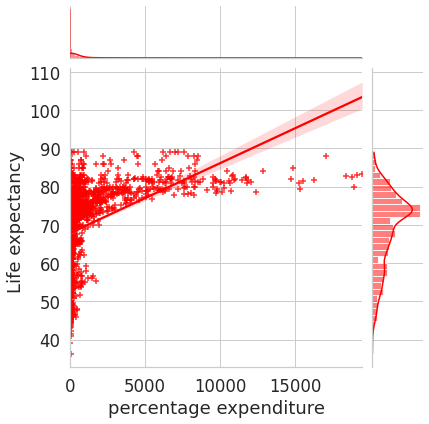

In [ ]:
plt.figure(figsize=(10,5))
sns.jointplot(x='percentage expenditure', y='Life expectancy ', data=data, marker="+", color='red', kind='reg')
plt.show()

Countries having a higher healthcare expenditure percentage allocation of their GDP per capita have higher and more stable life expectancy.

In [ ]:
df['Percentage_Expenditure'] = data['percentage expenditure']

**Feature 8: Hepatitis B**

Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

In [ ]:
nullcount('Hepatitis B')

553

In [ ]:
# I decided to impute the missing values with the mean of Hepatitis B per country then take the average of the whole to fill in the missing values still existed
df['Hepatitis B']= data.groupby('Country')['Hepatitis B'].apply(lambda x:x.fillna(x.mean()))
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace=True)

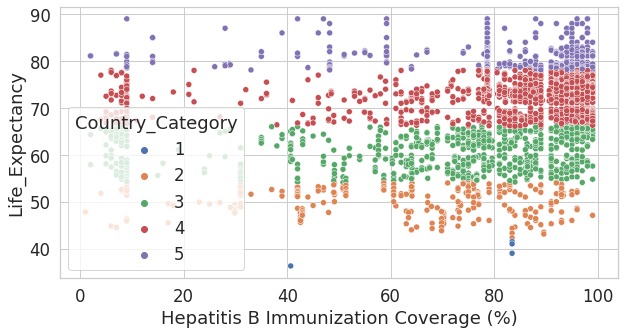

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Hepatitis B', y='Life_Expectancy', data=df, hue='Country_Category')
plt.xlabel('Hepatitis B Immunization Coverage (%)')
plt.show()

It seems that most countries have given the children Hepatitis B Immunization. According to the chart, besides other factors, children who received immunization have a higher life expectancy than those who did not.

**Feature 9: Measles**

Number of reported cases per 1000 population

In [ ]:
nullcount('Measles ')

0

In [ ]:
data['Measles '].describe()

count      2938.000000
mean       2419.592240
std       11467.272489
min           0.000000
25%           0.000000
50%          17.000000
75%         360.250000
max      212183.000000
Name: Measles , dtype: float64

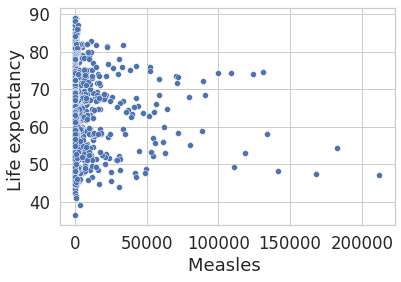

In [ ]:
sns.scatterplot(x='Measles ', y='Life expectancy ', data=data)

Some countries have so much measles cases, what are these countries that have > 50000 cases?

In [ ]:
measles_df = data[data['Measles '] >= 50000][['Country', 'Year', 'Measles ']]

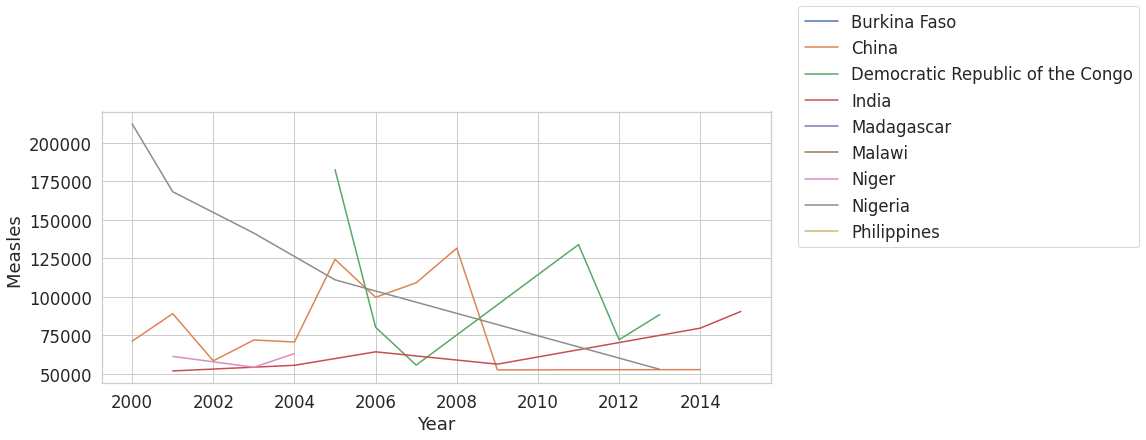

In [ ]:
plt.figure(figsize = (12,5))
sns.lineplot(x='Year', y='Measles ', data=measles_df, hue='Country')
plt.legend(loc=(1.04,0.5))

Nigeria have had an amazing downturn in measles cases over the past 15 years whereas India's trend in measles cases have been increasing yoy

In [ ]:
df['Measles'] = data['Measles ']

**Feature 10: BMI** 

Average Body Mass Index of entire population

In [ ]:
nullcount(' BMI ')

34

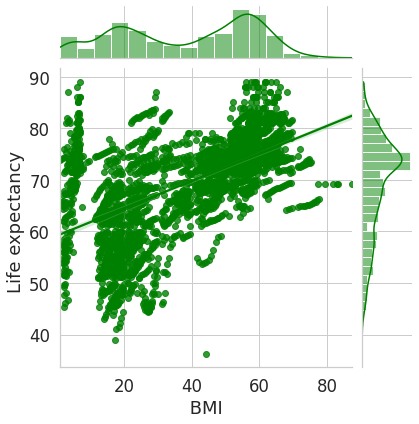

In [ ]:
sns.jointplot(x=' BMI ', y='Life expectancy ', data=data, kind='reg', color='green', )

Countries with higher average BMI tend to live longer, with some execptions of course. 

In [ ]:
df['BMI'] = data[' BMI ']
df['BMI'].fillna(data[' BMI '].mean(), inplace=True)

**Feature 11: Under-five deaths**

Number of under-five deaths per 1000 population

In [ ]:
data['under-five deaths '].isnull().sum()

0

In [ ]:
# We will not be doing analysis on this attribute
df['under_five_deaths'] = data['under-five deaths ']

**Feature 12: Polio**

Polio (Pol3) immunization coverage among 1-year-olds (%)

In [ ]:
#We will perform similar analysis as we did with Measles
nullcount('Polio')

19

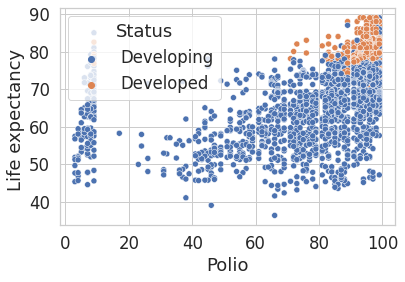

In [ ]:
sns.scatterplot(x='Polio', y='Life expectancy ', data=data, hue='Status')

Countries with high polio immunization coverage have a higher life expectancy. But there are some countries with very little polio immunization coverage, yet on average, their life expectancies are above 80 years old! What countries are these ?

In [ ]:
top3 = list(data[(data['Polio'] < 20) & (data['Life expectancy '] >= 80)]['Country'])
print(f'These countries are {top3}')

These countries are ['Canada', 'Chile', 'Iceland']


In [ ]:
df['Polio'] = data['Polio']
df['Polio'].fillna(df['Polio'].mean(), inplace=True)

**Feature 13 : Total Expenditure**

General government expenditure on health as a percentage of total government expenditure (%).

Since this feature is very similar to our feature 7, we will skip the analysis.

In [ ]:
data['Total expenditure'].isnull().sum()
df['Total_Expenditure'] = data['Total expenditure']
df['Total_Expenditure'].fillna(df['Total_Expenditure'].mean(), inplace=True)

**Feature 14 : Diphtheria**

Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

In [ ]:
nullcount('Diphtheria ')

19

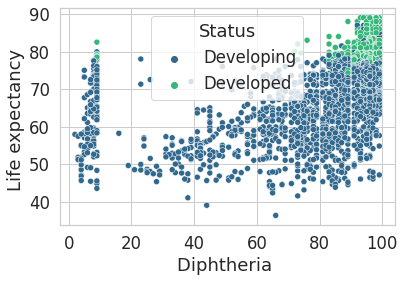

In [ ]:
sns.scatterplot(x='Diphtheria ', y='Life expectancy ', data=data, hue='Status', palette='viridis')

As we can see, there is a positive correlation between Diphtheria immunization and life expectancy. Majority of developed countries have immunized their 1 year old and it is perhaps one of the factors why their life expectancies are higher. 

In [ ]:
df['Diphtheria'] = data['Diphtheria ']
df['Diphtheria'].fillna(df['Diphtheria'].mean(), inplace=True)

**Feature 15: HIV/AIDS**

Deaths per 1000 live births HIV/AIDS (0-4 years)

In [ ]:
nullcount(' HIV/AIDS')

0

In [ ]:
fig = px.scatter(data, x=" HIV/AIDS", y="Life expectancy ",
	         size=" HIV/AIDS", color="Year",
                 hover_name="Country", log_x=True, size_max=60)
fig.show(renderer="colab")

African countries have the most deaths caused by HIV/AIDS, especially prior to 2010. 

In [ ]:
df['HIV/AIDS'] = data[' HIV/AIDS']

**Feature 16: GDP** 

Gross Domestic Product per capita (in USD)

In [ ]:
nullcount('GDP')

448

In [ ]:
fig = px.line(data, x="Year", y="GDP", color='Country', hover_name="Country")
fig.show(renderer='colab')

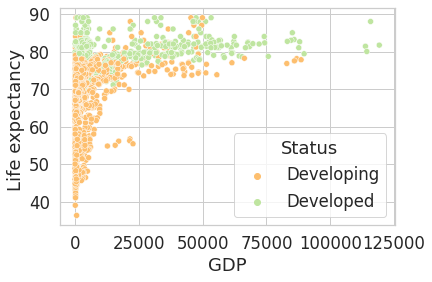

In [ ]:
sns.scatterplot(x='GDP', y='Life expectancy ', data=data, hue='Status', palette="Spectral")

In [ ]:
df['GDP'] = data['GDP']
df['GDP'].fillna(df['GDP'].mean(), inplace=True)

**Feature 17: Population**

Population of the country

In [ ]:
data.Population.head()

0    33736494.0
1      327582.0
2    31731688.0
3     3696958.0
4     2978599.0
Name: Population, dtype: float64

In [ ]:
fig = px.scatter(data, x="Population", y="Life expectancy ", color="Year",
                 hover_data= ['Country'])
fig.show(renderer='colab')

The density of a country's population does not seem to determine it's peoples' life expectancy.

In [ ]:
nullcount('Population')

652

In [ ]:
data['Population']

0       33736494.0
1         327582.0
2       31731688.0
3        3696958.0
4        2978599.0
           ...    
2933    12777511.0
2934    12633897.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: Population, Length: 2938, dtype: float64

In [ ]:
# I found a lot of anomalies in the population column, hence I decided not to include this feature for the model

**Feature 19-22: thinness  10-19 years,  thinness 5-9 years, Income composition of resources, Schooling**

In [ ]:
print(nullcount(' thinness  1-19 years'))
print(nullcount(' thinness 5-9 years'))
print(nullcount('Income composition of resources'))
print(nullcount('Schooling'))

34
34
167
163


In [ ]:
df['thinness_10-19_years'] = data[' thinness  1-19 years']
df['thinness_5-9_years'] = data[' thinness 5-9 years']
df['Income_composition_of_resources'] = data['Income composition of resources']
df['Schooling'] = data['Schooling']


In [ ]:
def nullfill(col):
  df[col].fillna(df[col].mean(), inplace=True)

nullfill('thinness_10-19_years')
nullfill('thinness_5-9_years')
nullfill('Income_composition_of_resources')
nullfill('Schooling')

**Correlations** 

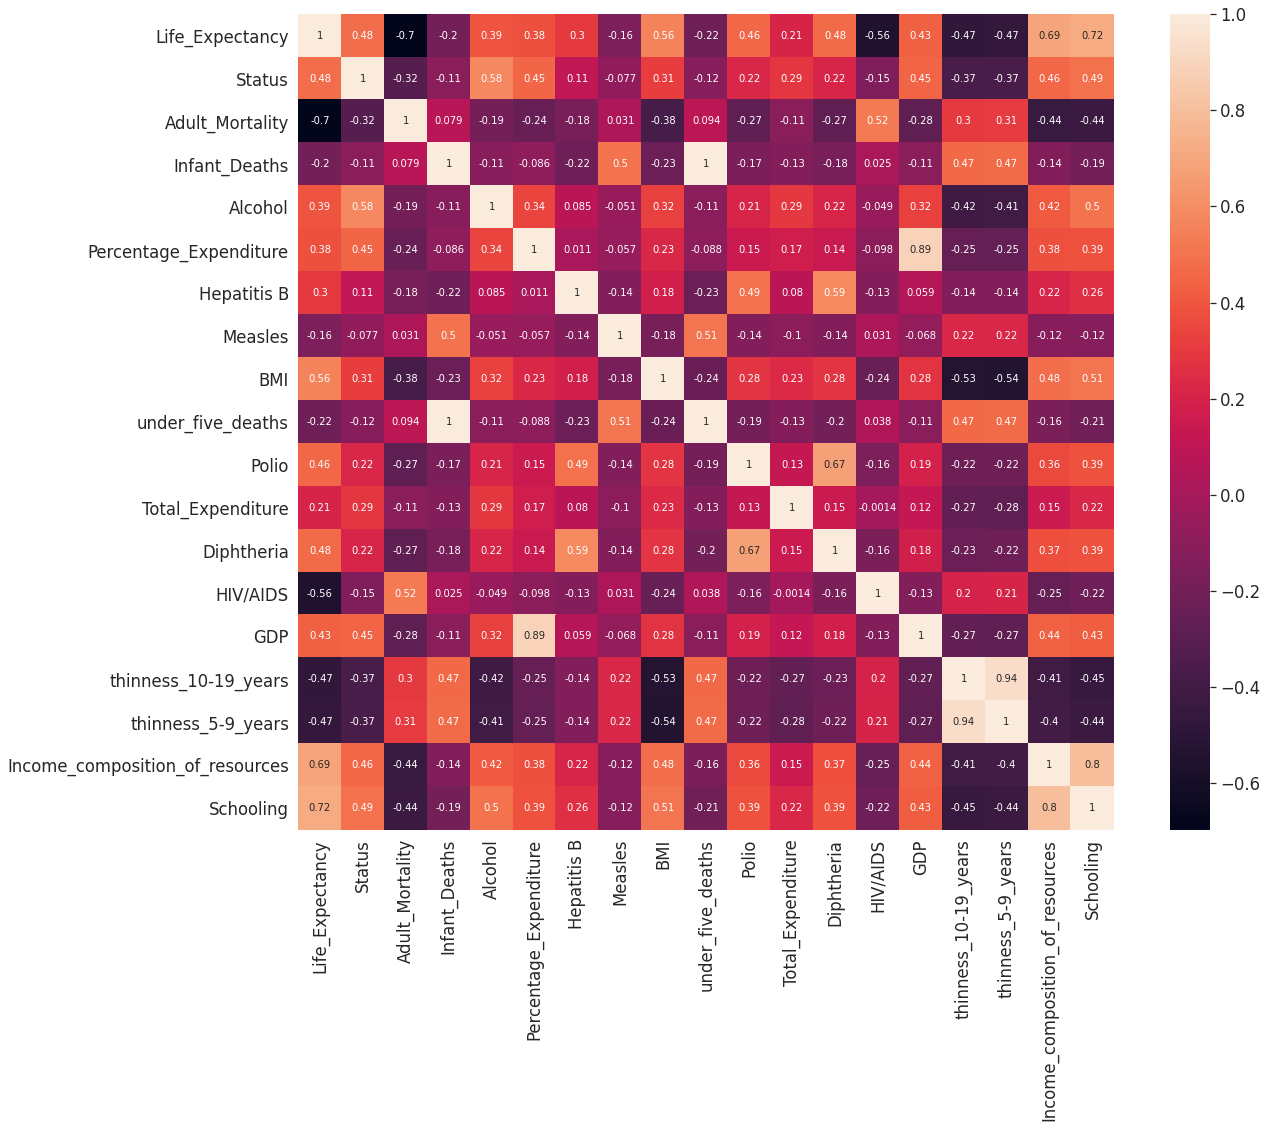

In [ ]:
fig = plt.subplots(figsize = (20,15))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country_Category                 2938 non-null   category
 1   Life_Expectancy                  2938 non-null   float64 
 2   Status                           2938 non-null   int64   
 3   Adult_Mortality                  2938 non-null   float64 
 4   Infant_Deaths                    2938 non-null   int64   
 5   Alcohol                          2938 non-null   float64 
 6   Percentage_Expenditure           2938 non-null   float64 
 7   Hepatitis B                      2938 non-null   float64 
 8   Measles                          2938 non-null   int64   
 9   BMI                              2938 non-null   float64 
 10  under_five_deaths                2938 non-null   int64   
 11  Polio                            2938 non-null   float64 
 12  Total_

**Models Preparation and Testing**

In [ ]:
country_dummy = pd.get_dummies(df['Country_Category'])
# Dummy variables for Country_Category feature.

#Concat country_dummy with our df and we will drop the Country_Category column
model_df = pd.concat([df,country_dummy], axis=1)
model_df.drop('Country_Category', inplace=True, axis=1)

In [ ]:
X = model_df.loc[:, model_df.columns != 'Life_Expectancy']
y = model_df['Life_Expectancy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
def regression_model(reg_algo):
  regressor = reg_algo
  regressor.fit(X_train, y_train)

  prediction = regressor.predict(X_test)

  print('Mean Absolute Error:', mean_absolute_error(y_test,prediction))
  print('Mean Squared Error:',mean_squared_error(y_test,prediction))
  print('rSquare:',r2_score(y_test,prediction))

In [ ]:
#Linear Regression 

regression_model(LinearRegression())

Mean Absolute Error: 2.1255060708361238
Mean Squared Error: 7.275127149864577
rSquare: 0.9200899385569277


In [ ]:
#Lasso Regression

regression_model(Lasso(alpha=0.001))

Mean Absolute Error: 2.119995018606272
Mean Squared Error: 7.246718318355271
rSquare: 0.9204019814153781


The 2 models produce almost similar results which is great.